<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
# type your code here
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# import 'is_string_dtype' to check the string type 
from pandas.api.types import is_string_dtype

# import function to perform feature selection
from sklearn.feature_selection import RFE

#### Read the data

Load the csv file and print the first five observations.

In [2]:
# type your code here
# load the csv file
df_bank = pd.read_csv("bank_churn.csv")

# display the first two observations
df_bank.head()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.000000,1,1,1
1,608,Spain,Female,41,1,83807.860000,1,0,0
2,502,France,Female,42,8,159660.800000,3,1,1
3,699,France,Female,39,1,0.000000,2,0,0
4,850,Spain,Female,43,2,125510.820000,1,1,0


**The data definition is as follows:** <br>

**CreditScore**: Credit score of the customer 

**Geography**: Resident country of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**NumOfYrsWithBank**: Years for which the customer has been with the bank

**Balance**: Bank balance of the customer in Euro

**NumOfProducts**: Number of bank facilities for which customer has opted

**HasCrCard**: Whether the customer has credit card or not (1 = Yes, 0 = No)

**Closed_Acc**: Whether the customer has closed the bank account or not (1 = Yes, 0 = No) (target/dependent variable)

Our objective is to predict whether the customer has closed the bank account or not.

In [3]:
df_bank.shape

(9920, 9)

In [4]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 9 columns):
CreditScore         9920 non-null int64
Geography           9920 non-null object
Gender              9920 non-null object
Age                 9920 non-null int64
NumOfYrsWithBank    9920 non-null int64
Balance             9920 non-null float64
NumOfProducts       9920 non-null int64
HasCrCard           9920 non-null int64
Closed_Acc          9920 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 697.6+ KB


In [24]:
df_bank.duplicated().sum()

5

In [25]:
df_bank.isnull().sum()

CreditScore         0
Geography           0
Gender              0
Age                 0
NumOfYrsWithBank    0
Balance             0
NumOfProducts       0
HasCrCard           0
Closed_Acc          0
dtype: int64

In [5]:
df_bank.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'NumOfYrsWithBank',
       'Balance', 'NumOfProducts', 'HasCrCard', 'Closed_Acc'],
      dtype='object')

In [6]:
df_bank.describe()

,CreditScore,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
count,9920.000000,9920.000000,9920.000000,9920.000000,9920.000000,9920.000000,9920.000000
mean,650.804536,38.768347,5.006351,76477.336143,1.529940,0.705847,0.203831
std,96.119083,10.129247,2.890735,62407.729207,0.581073,0.455684,0.402865
min,382.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97221.520000,1.000000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,0.000000
max,850.000000,75.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [7]:
df_bank['Geography'].value_counts()

France     4972
Germany    2491
Spain      2457
Name: Geography, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_bank['Geography']=le.fit_transform(df_bank['Geography'])

In [9]:
df_bank['Geography'].value_counts()

0    4972
1    2491
2    2457
Name: Geography, dtype: int64

In [10]:
df_bank['Gender'].value_counts()

Male      5414
Female    4506
Name: Gender, dtype: int64

In [11]:
df_bank['Gender'].shape

(9920,)

In [12]:
df_bank['Gender'].values.reshape(-1,1).shape

(9920, 1)

In [13]:
from sklearn.preprocessing import OrdinalEncoder
ode=OrdinalEncoder(categories=[['Female','Male']])

df_bank['Gender']=ode.fit_transform(df_bank['Gender'].values.reshape(-1,1))

In [14]:
df_bank['Gender'].value_counts()

1.000000    5414
0.000000    4506
Name: Gender, dtype: int64

In [15]:
df_bank.dtypes

CreditScore           int64
Geography             int32
Gender              float64
Age                   int64
NumOfYrsWithBank      int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
Closed_Acc            int64
dtype: object

In [16]:
# type your code here
# calculate the first quartile
Q1 = df_bank.quantile(0.25)
print(Q1,'\n')
#calculate the third quartile
Q3 = df_bank.quantile(0.75)
print(Q3,'\n')
# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1
print(IQR)

CreditScore        584.000000
Geography            0.000000
Gender               0.000000
Age                 32.000000
NumOfYrsWithBank     2.000000
Balance              0.000000
NumOfProducts        1.000000
HasCrCard            0.000000
Closed_Acc           0.000000
Name: 0.25, dtype: float64 

CreditScore           718.000000
Geography               1.000000
Gender                  1.000000
Age                    44.000000
NumOfYrsWithBank        7.000000
Balance            127644.240000
NumOfProducts           2.000000
HasCrCard               1.000000
Closed_Acc              0.000000
Name: 0.75, dtype: float64 

CreditScore           134.000000
Geography               1.000000
Gender                  1.000000
Age                    12.000000
NumOfYrsWithBank        5.000000
Balance            127644.240000
NumOfProducts           1.000000
HasCrCard               1.000000
Closed_Acc              0.000000
dtype: float64


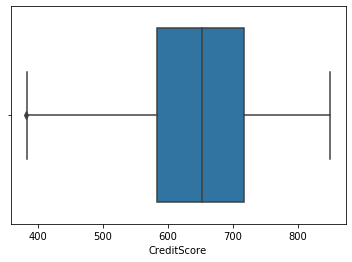

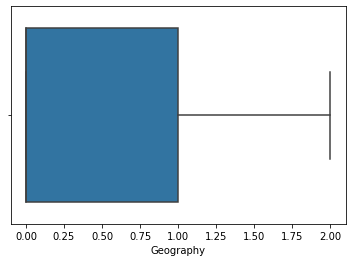

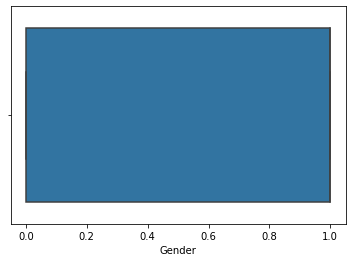

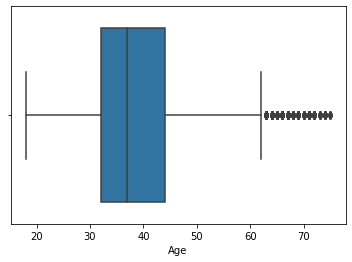

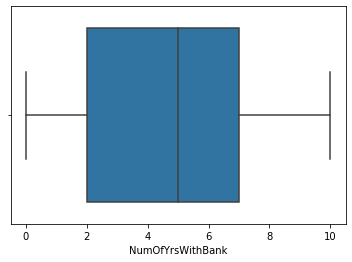

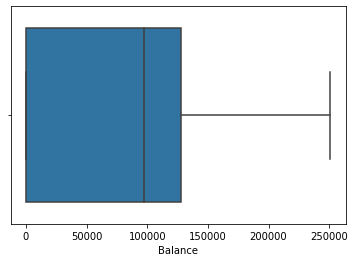

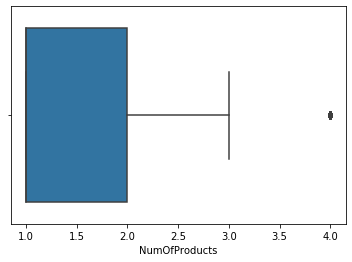

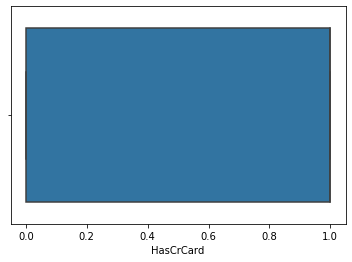

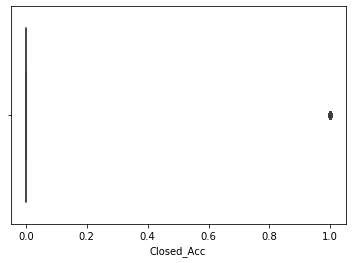

In [17]:
for i in df_bank.columns:
    sns.boxplot(df_bank[i])
    plt.show()

In [26]:
# store the target variable "y" in a dataframe 'df_target'
df_target = df_bank['Closed_Acc']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column "y" using drop()
# 'axis = 1' drops the specified column
df_feature = df_bank.drop('Closed_Acc', axis = 1)

In [27]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 8 columns):
CreditScore         9920 non-null int64
Geography           9920 non-null int32
Gender              9920 non-null float64
Age                 9920 non-null int64
NumOfYrsWithBank    9920 non-null int64
Balance             9920 non-null float64
NumOfProducts       9920 non-null int64
HasCrCard           9920 non-null int64
dtypes: float64(2), int32(1), int64(5)
memory usage: 581.4 KB


In [31]:
# replace: replace the existing value with the new value
# to_replace: existing value to replace
# value: the value to replace with
df_feature = df_feature.replace(to_replace='unknown', value=np.nan)

# print the first 5 observations
df_feature.head()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard
0,619,0,0.000000,42,2,0.000000,1,1
1,608,2,0.000000,41,1,83807.860000,1,0
2,502,0,0.000000,42,8,159660.800000,3,1
3,699,0,0.000000,39,1,0.000000,2,0
4,850,2,0.000000,43,2,125510.820000,1,1


In [32]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_feature.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_feature.isnull().sum()*100/df_feature.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
HasCrCard,0,0.000000
NumOfProducts,0,0.000000
Balance,0,0.000000
NumOfYrsWithBank,0,0.000000
Age,0,0.000000
Gender,0,0.000000
Geography,0,0.000000
CreditScore,0,0.000000


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the target variable imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code
df_target.value_counts()

0    7898
1    2022
Name: Closed_Acc, dtype: int64

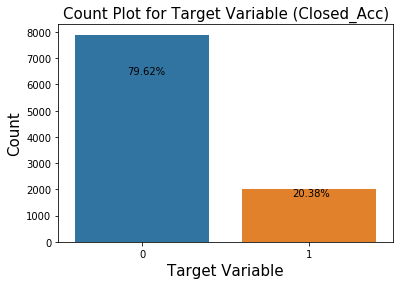

In [29]:
# consider only the target variable
df_target = df_bank['Closed_Acc']

# get counts of 0's and 1's in the 'CLOSED A/C' variable
df_target.value_counts()

# plot the countplot of the variable 'CLOSED A/C'
sns.countplot(x = df_target)

# use below code to print the percentage values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text to be printed
plt.text(x = -0.09, y = df_target.value_counts()[0] - 1500, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.90, y = df_target.value_counts()[1] - 300, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Closed_Acc)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full logistic model and calculate the odds for each variable (consider the probability  threshold as 0.25)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_feature'
num_scaled = X_scaler.fit_transform(df_feature)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X = pd.DataFrame(num_scaled, columns = df_feature.columns)

# display first five observations
X.head()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard
0,-0.330903,-0.902174,-1.096134,0.319058,-1.040048,-1.225508,-0.912048,0.645553
1,-0.445351,1.514994,-1.096134,0.220329,-1.385998,0.117468,-0.912048,-1.549061
2,-1.548205,-0.902174,-1.096134,0.319058,1.035654,1.332970,2.530035,0.645553
3,0.501439,-0.902174,-1.096134,0.022871,-1.385998,-1.225508,0.808993,-1.549061
4,2.072487,1.514994,-1.096134,0.417787,-1.040048,0.785735,-0.912048,0.645553


In [34]:
X.shape

(9920, 8)

In [36]:
y=df_target


In [37]:
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [38]:
logreg = sm.Logit(y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.448896
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 7936
Model:                          Logit   Df Residuals:                     7927
Method:                           MLE   Df Model:                            8
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                  0.1100
Time:                        13:31:21   Log-Likelihood:                -3562.4
converged:                       True   LL-Null:                       -4002.6
Covariance Type:            nonrobust   LLR p-value:                9.952e-185
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5566      0.032    -48.316      0.000      -1.620      -1.493
CreditScore

In [39]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
const,0.210861
CreditScore,0.944742
Geography,1.054847
Gender,0.757120
Age,2.039141
NumOfYrsWithBank,0.991302
Balance,1.364908
NumOfProducts,0.970505
HasCrCard,0.990537


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Calculate the Specificity and Sensitivity from the confusion matrix of the full model (consider the probability threshold as 0.25)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# convert probabilities to 0 and 1 using 'if_else'
y_class = [ 0 if x < 0.25 else 1 for x in y_pred_prob]

# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_class)

# True Negatives are denoted by 'TN'
# Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'
# Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'
# it is the type 1 error
# Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN'
# it is the type 2 error
# Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)

# print the accuracy
print("Accuracy:", accuracy)
print("Confusion_Matrix",cm)

Accuracy: 0.7520161290322581
Confusion_Matrix [[1265  307]
 [ 185  227]]


In [41]:
#sensitivity
227/(227+185)

0.5509708737864077

In [42]:
#specificity
307/(307+1265)

0.19529262086513996

In [43]:
y_test.value_counts()

0    1572
1     412
Name: Closed_Acc, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a logistic model on the 6 features obtained by RFE and plot the ROC curve 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [45]:
# type your code here
# initiate logistic regression model 
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg, n_features_to_select = 6)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts'],
      dtype='object')


In [50]:
# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variab# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
# consider the variables obtained from RFE method and the intercept term
logreg_rfe = sm.Logit(y_train, X_train[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts']]).fit()

X_test_new=X_test[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts']]

# let 'y_pred_prob' be the predicted values of y
y_pred_prob_rfe = logreg_rfe.predict(X_test_new)

# convert probabilities to 0 and 1 using 'if_else'
y_class = [ 0 if x < 0.25 else 1 for x in y_pred_prob_rfe]

# pass the actual and predicted target values to the accuracy_score()
print("Accuracy:",accuracy_score(y_test, y_class))

# pass the actual and predicted target values to the f1_score()
print("F1 score:",f1_score(y_test, y_class))


Optimization terminated successfully.
         Current function value: 0.654641
         Iterations 5
Accuracy: 0.22379032258064516
F1 score: 0.34801016088060965


In [53]:
cr=classification_report(y_test,y_class)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.02      0.04      1572
           1       0.21      1.00      0.35       412

    accuracy                           0.22      1984
   macro avg       0.59      0.51      0.19      1984
weighted avg       0.81      0.22      0.10      1984



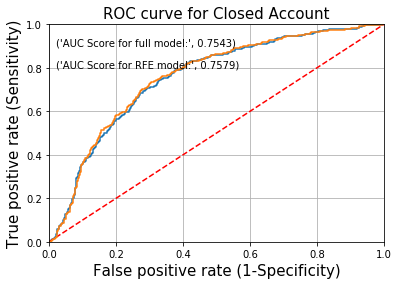

In [51]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Closed Account', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for full model:',round(metrics.roc_auc_score(y_test, y_pred_prob),4)))

# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob_rfe)

# plot the ROC curve
plt.plot(fpr1, tpr1)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.8, s = ('AUC Score for RFE model:',round(metrics.roc_auc_score(y_test, y_pred_prob_rfe),4)))
                               
# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Obtain the optimal value of cut-off probability for the full model using the Youden's index 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [54]:
# type your code here
# build the model on train data 
# use fit() to fit the logistic regression model
logreg_full = sm.Logit(y_train, X_train).fit()

# let 'y_pred_prob' be the predicted values of y
y_pred_prob_full = logreg_full.predict(X_test)

# print the summary of the model
print(logreg_full.summary())

Optimization terminated successfully.
         Current function value: 0.448896
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 7936
Model:                          Logit   Df Residuals:                     7927
Method:                           MLE   Df Model:                            8
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                  0.1100
Time:                        13:44:00   Log-Likelihood:                -3562.4
converged:                       True   LL-Null:                       -4002.6
Covariance Type:            nonrobust   LLR p-value:                9.952e-185
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.5566      0.032    -48.316      0.000      -1.620      -1.493
CreditScore

In [55]:
# use the full model in Q5
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_full.predict(X_test)

# obtain the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.742718,0.327608,0.188702,0.415110
1,0.747573,0.333333,0.186822,0.414239
2,0.745146,0.331425,0.187557,0.413721
3,0.752427,0.339059,0.185702,0.413369
4,0.740291,0.326972,0.189285,0.413319


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Consider the cut-off probability obtained from Youden's index for the full model and calculate the following measures:<br>
                    a. f-1 score <br>
                    b. Accuracy<br>
                    c. Kappa Score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
# type your code here
logreg_rfe = sm.Logit(y_train, X_train[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts']]).fit()

X_test_new=X_test[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts']]

# let 'y_pred_prob' be the predicted values of y
y_pred_prob_rfe = logreg_rfe.predict(X_test_new)

# convert probabilities to 0 and 1 using 'if_else'
y_class = [ 0 if x < 0.25 else 1 for x in y_pred_prob_rfe]

# pass the actual and predicted target values to the accuracy_score()
print("Accuracy:",accuracy_score(y_test, y_class))

# pass the actual and predicted target values to the f1_score()
print("F1 score:",f1_score(y_test, y_class))

# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_full.predict(X_test)

# convert probabilities to 0 and 1 using 'if_else'
y_class = [ 0 if x < 0.25 else 1 for x in y_pred_prob]

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_class)

# print the kappa value
print('kappa value:',kappa)

Optimization terminated successfully.
         Current function value: 0.654641
         Iterations 5
Accuracy: 0.22379032258064516
F1 score: 0.34801016088060965
kappa value: 0.3206463035756044


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Identify the variables involved in multicollinearity 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [59]:
# type your code here
df_feature.corr()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard
CreditScore,1.000000,0.009679,-0.003890,-0.006079,-0.000357,0.007654,0.012362,-0.003417
Geography,0.009679,1.000000,0.003818,0.025938,0.002612,0.067245,0.004151,-0.009036
Gender,-0.003890,0.003818,1.000000,-0.028681,0.015593,0.011900,-0.020591,0.005574
Age,-0.006079,0.025938,-0.028681,1.000000,-0.010093,0.032197,-0.029088,-0.013432
NumOfYrsWithBank,-0.000357,0.002612,0.015593,-0.010093,1.000000,-0.012654,0.013781,0.021164
Balance,0.007654,0.067245,0.011900,0.032197,-0.012654,1.000000,-0.304061,-0.015933
NumOfProducts,0.012362,0.004151,-0.020591,-0.029088,0.013781,-0.304061,1.000000,0.003184
HasCrCard,-0.003417,-0.009036,0.005574,-0.013432,0.021164,-0.015933,0.003184,1.000000


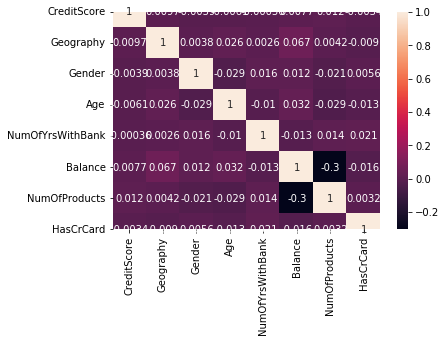

In [73]:
sns.heatmap(df_feature.corr(), annot = True)
plt.yticks(rotation = 'horizontal', fontsize = 10)
plt.xticks(fontsize = 10)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a logistic regression model using the categorical variables and the variables obtained after calculating VIF. Also, plot the ROC curve and compute the AUC score (consider the cut-off probability as 0.6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
# type your code here
df_numeric = df_bank.select_dtypes(include=np.number).drop(["Closed_Acc"],axis=1)

# scale all the numeric independent variables
num_scaled=df_numeric.apply(lambda rec:rec-rec.mean()/rec.std(),axis=0)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num = pd.DataFrame(num_scaled, columns = num_scaled.columns)

# consider all the categorical variables in the data
# select_dtypes: selects the variable having specified datatype
# include: includes the variables with specified datatype
df_cat = df_bank.select_dtypes(include="object")

# convert the categorical variable to dummy variable
# get_dummies(): converts the variable to categorical variable
# drop_first=True: indicates n-1 dummy enoding; if set to false indicates one-hot encoding


# concatenate the scaled numerical and dummy variables
# axis: specifies whether to drop labels from index or columns; use 1 for columns and 0 for index
X = pd.concat([df_num,df_cat],axis=1)

# consider the dependent variable
y = df_bank.Closed_Acc

# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, random_state = 1, test_size = 0.2)

In [77]:
# build the model on train data 
# use fit() to fit the logistic regression model
logreg_full = sm.Logit(y_train_full, X_train_full).fit()

# let 'y_pred_prob' be the predicted values of y
y_pred_prob_full = logreg_full.predict(X_test_full)

# print the summary of the model
print(logreg_full.summary())

Optimization terminated successfully.
         Current function value: 0.448896
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 7936
Model:                          Logit   Df Residuals:                     7927
Method:                           MLE   Df Model:                            8
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                  0.1100
Time:                        14:04:59   Log-Likelihood:                -3562.4
converged:                       True   LL-Null:                       -4002.6
Covariance Type:            nonrobust   LLR p-value:                9.952e-185
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.3769      0.250    -17.474      0.000      -4.868      -3.886
CreditScore

In [79]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_full.columns
vif['VIF'] = [variance_inflation_factor(X_train_full.values, i) for i in range(X_train_full.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,68.550000
6,Balance,1.110000
7,NumOfProducts,1.100000
2,Geography,1.010000
1,CreditScore,1.000000
3,Gender,1.000000
4,Age,1.000000
5,NumOfYrsWithBank,1.000000
8,HasCrCard,1.000000


In [84]:
X_train_sm = sm.add_constant(X_train_full)
logm3 = sm.GLM(y_train,X_train_full, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Closed_Acc   No. Observations:                 7936
Model:                            GLM   Df Residuals:                     7927
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3562.4
Date:                Thu, 18 Nov 2021   Deviance:                       7124.9
Time:                        14:36:08   Pearson chi2:                 7.63e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.3769      0.250    -17.474      0.000      -4.868      -3.886
CreditScore         -0.0006      0.000     -1.904      0.057      -0.001    1.74e-05
Geography            0.0645      0.037      1.760      0.078      -0.007       0.136
Gender              -0.5588      0.060     -9.354      0.000      -0.676      -0.442
Age                  0.0703      0.003     24.626      0.000       0.065       0.076
NumOfYrsWithBank    -0.0030      0.010     -0.295      0.768      -0.023       0.017
Balance           4.985e-06   5.12e-07      9.744      0.000    3.98e-06    5.99e-06
NumOfProducts       -0.0515      0.051     -1.008      0.314      -0.152       0.049
HasCrCard           -0.0209      0.065     -0.322      0.748      -0.148       0.106
====================================================================================
"""

In [89]:
logreg_rfe = sm.Logit(y_train, X_train[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts','HasCrCard','NumOfYrsWithBank']]).fit()

X_test_new=X_test[['CreditScore', 'Geography', 'Gender', 'Age', 'Balance',
       'NumOfProducts','HasCrCard','NumOfYrsWithBank']]

# let 'y_pred_prob' be the predicted values of y
y_pred_prob_rfe = logreg_rfe.predict(X_test_new)

# convert probabilities to 0 and 1 using 'if_else'
y_class = [ 0 if x < 0.6 else 1 for x in y_pred_prob_rfe]

# pass the actual and predicted target values to the accuracy_score()
print("Accuracy:",accuracy_score(y_test, y_class))

# pass the actual and predicted target values to the f1_score()
print("F1 score:",f1_score(y_test, y_class))


Optimization terminated successfully.
         Current function value: 0.654641
         Iterations 5
Accuracy: 0.7757056451612904
F1 score: 0.4783118405627198


In [90]:
cr=classification_report(y_test,y_class)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1572
           1       0.46      0.50      0.48       412

    accuracy                           0.78      1984
   macro avg       0.66      0.67      0.67      1984
weighted avg       0.78      0.78      0.78      1984



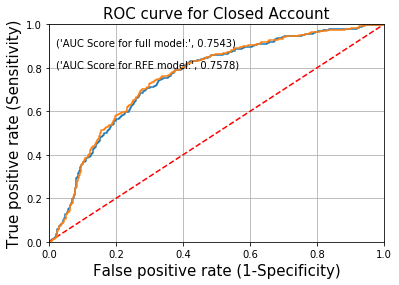

In [91]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Closed Account', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score for full model:',round(metrics.roc_auc_score(y_test, y_pred_prob),4)))

# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob_rfe)

# plot the ROC curve
plt.plot(fpr1, tpr1)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.8, s = ('AUC Score for RFE model:',round(metrics.roc_auc_score(y_test, y_pred_prob_rfe),4)))
                               
# plot the grid
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Consider the costs of false negatives and false positives as 2 and 0.5 respectively to obtain the optimal cut-off probability for which the total cost will be minimum
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full logistic model using the optimal cut-off probability obtained in Q9. Also, plot the confusion matrix and ROC curve along with the AUC score  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here